In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin, pi
import random


#-----------------------------------
# number of E- and I-cells:
num_e=80; num_i=20;
#-----------------------------------
# density of synaptic connections: 
p_ee=1.0; p_ei=1.0; p_ie=1.0; p_ii=1.0;
#-----------------------------------
# rise and decay time constants associated with synapses:
s1 = (num_e,1)
s2 = (num_i,1)
s_ee = (num_e,num_e)
s_ei = (num_e,num_i)
s_ie = (num_i,num_e)
s_ii = (num_i,num_i)

tau_r_e=0.1*np.ones(s1); tau_d_e=3*np.ones(s1); 
tau_r_i=0.3*np.ones(s2); tau_d_i=9*np.ones(s2); 
#-----------------------------------
# synaptic reversal potentials: 
v_rev_e=0; v_rev_i=-80;  
#-----------------------------------
# time simulated (in ms):
#t_final=200; 
t_final=200 #t_final=50
#-----------------------------------
# time step used in the midpoint method:
dt=0.02; #dt=0.0002
#-----------------------------------
# strength of synaptic connections: 
g_hat_ie=1.5; g_hat_ei=0.5; g_hat_ii=0.5; g_hat_ee=0.0;
#-----------------------------------
# external drive to the E-cells:

# deterministic drive:
#I_e=1.25*ones(num_e,1);
def I_e(v):
    return np.ones(s1)

# maximum conductance, decay time, and frequency of Poisson train of excitatory input pulses:
g_stoch_e=0; f_stoch_e=20; tau_d_stoch_e=3; 
#-----------------------------------
#-----------------------------------
# external drive to the I-cells:

# deterministic drive:
#I_i= zeros(num_i,1);
def I_i(v):
    return np.zeros(s2)
# maximum conductance, decay time, and frequency of Poisson train of excitatory input pulses:
g_stoch_i=0; f_stoch_i=0; tau_d_stoch_i=3; 
#-----------------------------------

After running the previous initialization, run one of the following initializations to override variables and produce the specific plots shown in Figure 1. Then run the function definition box as well as the gamma simulation box before producing the desired graph.

In [55]:
#Graph A Initialization
def I_e(v):
    I = np.ones(s1)
    for i in np.arange(num_e):
        I[i] = (2.5 + 2*i)/num_e
    return I

In [27]:
#Graph B Initialization
def I_e(v):
    return 1.25*np.ones(s1)
g_stoch_e = 0.1
f_stoch_e = 20
tau_d_stoch_e = 3


In [35]:
#Graph C Initialization
def I_e(v):
    I = np.ones(s1)
    for i in np.arange(20):
        I[i] = 3.25*I[i]
    for i in np.arange(20, 80, 1):
        I[i] = 1.25*I[i]
    return I
g_stoch_e = 0.1


In [40]:
#Graph D Initialization
def I_e(v):
    I = np.ones(s1)
    for i in np.arange(20):
        I[i] = 3.25*I[i]
    for i in np.arange(20, 80, 1):
        I[i] = 1.25*I[i]
    return I
g_stoch_e = 0.1
g_hat_ei = 0
g_hat_ii = 0
g_stoch_i = 0.5
f_stoch_i = 38
tau_d_stoch_i = 1

In [45]:
#Graph E Initialization
def I_e(v):
    return 4*sin(40*pi*v/1000)**8 + 4*sin(56*pi*v/1000)**2

In [50]:
#Graph F Initialization
g_hat_ie = 0
def I_e(v):
    return 4*sin(40*pi*v/1000)**8 + 4*sin(56*pi*v/1000)**2

In [56]:
#functions def

def h_e_inf(v):
    alpha_h=0.128*np.exp(-(v+50)/18)
    beta_h=4/(1+np.exp(-(v+27)/5))
    return (alpha_h/(alpha_h+beta_h))

def h_i_inf(v):
    alpha_h=0.07*np.exp(-(v+58)/20)
    beta_h=1/(np.exp(-0.1*(v+28))+1)
    return (alpha_h/(alpha_h+beta_h))

def m_e_inf(v):
    alpha_m=0.32*(v+54)/(1-np.exp(-(v+54)/4))
    beta_m=0.28*(v+27)/(np.exp((v+27)/5)-1)
    return (alpha_m/(alpha_m+beta_m))

def m_i_inf(v):
    alpha_m=0.1*(v+35)/(1-np.exp(-(v+35)/10))
    beta_m=4*np.exp(-(v+60)/18)
    return (alpha_m/(alpha_m+beta_m))

def n_e_inf(v):
    alpha_n=0.032*(v+52)/(1-np.exp(-(v+52)/5))
    beta_n=0.5*np.exp(-(v+57)/40)
    return (alpha_n/(alpha_n+beta_n))

def n_i_inf(v):
    alpha_n=-0.01*(v+34)/(np.exp(-0.1*(v+34))-1)
    beta_n=0.125*np.exp(-(v+44)/80)
    return (alpha_n/(alpha_n+beta_n))

def tau_h_e(v):
    alpha_h = 0.128*np.exp(-(v+50)/18)
    beta_h = 4/(1+np.exp(-(v+27)/5))
    return (1/(alpha_h+beta_h))

def tau_h_i(v):
    alpha_h=0.07*np.exp(-(v+58)/20)
    beta_h=1/(np.exp(-0.1*(v+28))+1)
    phi=5
    return (1/((alpha_h+beta_h)*phi)) 
    
def tau_n_e(v):
    alpha_n=0.032*(v+52)/(1-np.exp(-(v+52)/5));
    beta_n=0.5*np.exp(-(v+57)/40);
    return (1/(alpha_n+beta_n));

def tau_n_i(v):
    alpha_n=-0.01*(v+34)/(np.exp(-0.1*(v+34))-1);
    beta_n=0.125*np.exp(-(v+44)/80);
    phi=5
    return (1/((alpha_n+beta_n)*phi));


 

In [57]:

# "part" refers to which part of question 4 is being answered. 
# If part == 1, then returns voltages for E-cells and I-cells
# If part == 2, then returns spike_times and cell_numbers for raster plots

def gamma_simulation(part):
    
    # Initialize variables
    
    v_e=-80+30*np.random.rand(s1[0],s1[1]);
    n_e=0*np.ones(s1) 
    m_e=m_e_inf(v_e); 
    h_e=0*np.ones(s1); 
    s_e=np.zeros(s1);
    v_i=-80+30*np.random.rand(s2[0],s2[1]); 
    n_i=0*np.ones(s2); 
    m_i=m_i_inf(v_i);
    h_i=0*np.ones(s2); 
    s_i=np.zeros(s2);
    s_stoch_e=np.ones(s1); s_stoch_i=np.ones(s2);
    num_spikes_e=0; num_spikes_i=0;
    
    dt05=dt/2;
    m_steps1=np.floor(t_final/dt+0.1);
    m_steps=m_steps1.astype(int)
    r_e=np.exp(-dt05/tau_d_stoch_e);
    r_i=np.exp(-dt05/tau_d_stoch_i);

    # set synaptic conductances

    g_ee=g_hat_ee*np.divide(np.multiply(np.ones(s_ee),(np.sign(p_ee-np.random.rand(s_ee[0],s_ee[1]))+1)),2*(p_ee*num_e))
    g_ei=g_hat_ei*np.divide(np.multiply(np.ones(s_ei),(np.sign(p_ei-np.random.rand(s_ei[0],s_ei[1]))+1)),2*(p_ei*num_e))
    g_ie=g_hat_ie*np.divide(np.multiply(np.ones(s_ie),(np.sign(p_ie-np.random.rand(s_ie[0],s_ie[1]))+1)),2*(p_ie*num_i)) 
    g_ii=g_hat_ii*np.divide(np.multiply(np.ones(s_ii),(np.sign(p_ii-np.random.rand(s_ii[0],s_ii[1]))+1)),2*(p_ii*num_i))
    
    # Create arrays to store voltage data to draw action potential
    voltages_e = np.array([])
    voltages_i = np.array([])

    # Create new arrays to store data points for raster plot
    cell_numbers = np.array([])
    spike_times = np.array([])
    iteration = 0
    
    # solve the system of Hodgkin-Huxley-like equations using the midpoint method

    for k in range(m_steps):
        t_old=(k-1)*dt; t_new=k*dt; t_mid=(t_old+t_new)/2;

        v_e_inc=0.1*(-67-v_e)+80*np.multiply((n_e**4),(-100-v_e)) \
                +100*np.multiply((m_e**3),np.multiply(h_e,(50-v_e))) \
                +np.multiply(np.dot(g_ee.T,s_e),(v_rev_e-v_e))+np.multiply(np.dot(g_ie.T,s_i),(v_rev_i-v_e))\
                +I_e(t_old)+g_stoch_e*np.multiply(s_stoch_e,(v_rev_e-v_e));
        n_e_inc=np.divide((n_e_inf(v_e)-n_e),tau_n_e(v_e));
        h_e_inc=np.divide((h_e_inf(v_e)-h_e),tau_h_e(v_e));
        s_e_inc=np.divide(np.multiply(0.5*(1+np.tanh(v_e/4)),(1-s_e)),tau_r_e)\
                -np.divide(s_e,tau_d_e);
    
        
        v_i_inc=0.1*(-65-v_i)+9*np.multiply(((n_i)**4),(-90-v_i))\
                +35*np.multiply((m_i)**3,np.multiply(h_i,(55-v_i)))\
                +np.multiply(np.dot(g_ei.T,s_e),(v_rev_e-v_i))+np.multiply(np.dot(g_ii.T,s_i),(v_rev_i-v_i))\
                +I_i(t_old)+g_stoch_i*np.multiply(s_stoch_i,(v_rev_e-v_i));
        n_i_inc=np.divide((n_i_inf(v_i)-n_i),tau_n_i(v_i));
        h_i_inc=np.divide((h_i_inf(v_i)-h_i),tau_h_i(v_i));
        s_i_inc=np.divide(np.multiply(0.5*(1+np.tanh(v_i/4)),(1-s_i)),tau_r_i)\
                -np.divide(s_i,tau_d_i);

        v_e_tmp=v_e+dt05*v_e_inc;
        n_e_tmp=n_e+dt05*n_e_inc;
        m_e_tmp=m_e_inf(v_e_tmp);
        h_e_tmp=h_e+dt05*h_e_inc;
        s_e_tmp=s_e+dt05*s_e_inc;    
        v_i_tmp=v_i+dt05*v_i_inc;
        n_i_tmp=n_i+dt05*n_i_inc;
        m_i_tmp=m_i_inf(v_i_tmp);
        h_i_tmp=h_i+dt05*h_i_inc;
        s_i_tmp=s_i+dt05*s_i_inc;   
        s_stoch_e=s_stoch_e*r_e; s_stoch_i=s_stoch_i*r_i;

        v_e_inc=0.1*(-67-v_e_tmp)+80*np.multiply((n_e_tmp)**4,(-100-v_e_tmp))\
                   +100*np.multiply((m_e_tmp)**3,np.multiply(h_e_tmp,(50-v_e_tmp)))\
                   +np.multiply(np.dot(g_ee.T,s_e_tmp),(v_rev_e-v_e_tmp))\
                   +np.multiply(np.dot(g_ie.T,s_i_tmp),(v_rev_i-v_e_tmp))\
                    +I_e(t_mid)+g_stoch_e*np.multiply(s_stoch_e,(v_rev_e-v_e_tmp));
        n_e_inc=np.divide((n_e_inf(v_e_tmp)-n_e_tmp),tau_n_e(v_e_tmp));
        h_e_inc=np.divide((h_e_inf(v_e_tmp)-h_e_tmp),tau_h_e(v_e_tmp));
    
        s_e_inc=np.divide(np.multiply(0.5*(1+np.tanh(v_e_tmp/4)),(1-s_e_tmp)),tau_r_e)\
                    -np.divide(s_e_tmp,tau_d_e); 
        v_i_inc=0.1*(-65-v_i_tmp)+9*np.multiply((n_i_tmp)**4,(-90-v_i_tmp))\
                   +35*np.multiply((m_i_tmp)**3, np.multiply(h_i_tmp,(55-v_i_tmp)))\
                   +np.multiply(np.dot(g_ei.T,s_e_tmp),(v_rev_e-v_i_tmp))\
                   +np.multiply(np.dot(g_ii.T,s_i_tmp),(v_rev_i-v_i_tmp))\
                    +I_i(t_mid)+g_stoch_i*np.multiply(s_stoch_i,(v_rev_e-v_i_tmp));
        n_i_inc=np.divide((n_i_inf(v_i_tmp)-n_i_tmp),tau_n_i(v_i_tmp));
        h_i_inc=np.divide((h_i_inf(v_i_tmp)-h_i_tmp),tau_h_i(v_i_tmp));
        s_i_inc=np.divide(np.multiply(0.5*(1+np.tanh(v_i_tmp/4)),(1-s_i_tmp)),tau_r_i)\
                    -np.divide(s_i_tmp,tau_d_i);
        
        v_e_old=v_e;
        v_i_old=v_i;
        v_e=v_e+dt*v_e_inc;
        n_e=n_e+dt*n_e_inc;
        m_e=m_e_inf(v_e);
        h_e=h_e+dt*h_e_inc;
        s_e=s_e+dt*s_e_inc;
        v_i=v_i+dt*v_i_inc;
        n_i=n_i+dt*n_i_inc;
        m_i=m_i_inf(v_i);
        h_i=h_i+dt*h_i_inc;
        s_i=s_i+dt*s_i_inc;
        
        # Update voltages_e and voltages_i for Part 1
        # Use np.average to get an average of all cells
        
        voltages_e = np.append(voltages_e, np.average(v_e))
        voltages_i = np.append(voltages_i, np.average(v_i))
    
        #Check for spikes in E_cells
        
        for i in np.arange(num_e):
            if v_e_old[i] < 0 and v_e[i] >= 0:
                cell_numbers = np.append(cell_numbers, i + 20)
                spike_times = np.append(spike_times, iteration)
    
        #Check for spikes in I_cells
        
        for i in np.arange(num_i):
            if v_i_old[i] < 0 and v_i[i] >= 0:
                cell_numbers = np.append(cell_numbers, i)
                spike_times = np.append(spike_times, iteration)
    
        iteration += 1
        
        # Stochastic decay or jump to 1
        
        s_stoch_e=s_stoch_e*r_e; s_stoch_i=s_stoch_i*r_i;
        u_e=np.random.rand(num_e,1); u_i=np.random.rand(num_i,1);
        s_stoch_e=s_stoch_e+np.multiply(np.maximum(np.sign(f_stoch_e*dt/1000-u_e),np.zeros(s1)),(1-s_stoch_e));
        s_stoch_i=s_stoch_i+np.multiply(np.maximum(np.sign(f_stoch_i*dt/1000-u_i),np.zeros(s2)),(1-s_stoch_i));
        
    if part == 1:
        return voltages_e, voltages_i, iteration
    else:
        return cell_numbers, spike_times



Problem 4, Part 1

Form of action potentials for E cells (blue) and I cells (orange). The I cells fire immediately after the E cells fire. (Note: the voltage was averaged across all E cells and I cells to obtain this graph)

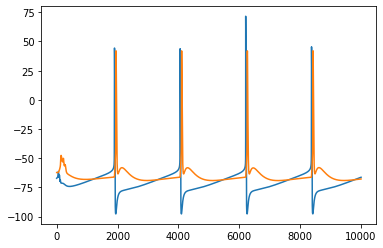

In [8]:
voltages_e, voltages_i, iteration = gamma_simulation(1)
plt.plot(np.arange(iteration), voltages_e)
plt.plot(np.arange(iteration), voltages_i)

Raster plot visualizing the firing of each individual neuron.

In [9]:
cell_numbers, spike_times = gamma_simulation(2)

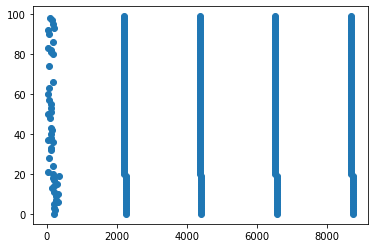

In [10]:
plt.scatter(spike_times, cell_numbers, marker='o')

Problem 4, Part 2

To generate each graph, run the first initialization, then the overriding initialization unique to each plot in the figure. After that run the function defining box and the gamma_simulation defining box, then create the plot below.

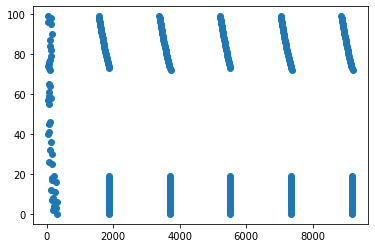

In [58]:
#Plot Graph A
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')

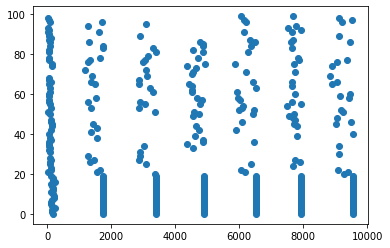

In [33]:
#Plot Graph B
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')

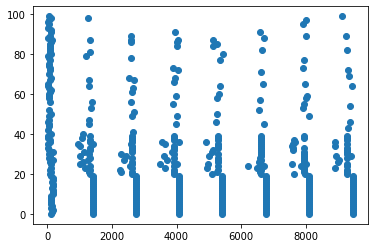

In [38]:
#Plot Graph C
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')

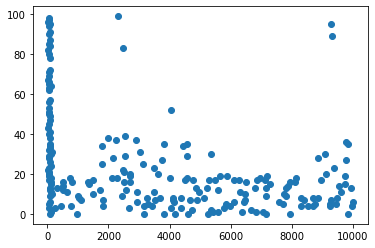

In [43]:
#Plot Graph D
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')

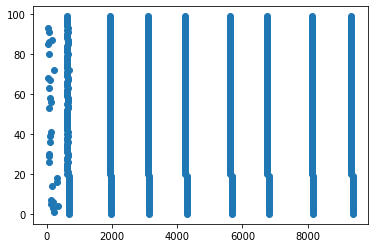

In [48]:
#Plot Graph E
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')

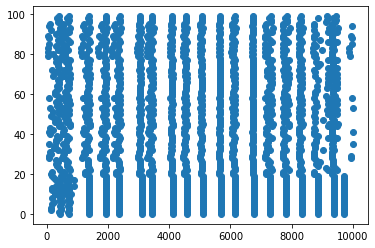

In [53]:
#Plot Graph F
cell_numbers, spike_times = gamma_simulation(2)
plt.scatter(spike_times, cell_numbers, marker='o')